# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q=Bujumbura"
response = requests.get(query_url).json()
pprint(response)



{'base': 'stations',
 'clouds': {'all': 74},
 'cod': 200,
 'coord': {'lat': -3.3822, 'lon': 29.3644},
 'dt': 1717879124,
 'id': 425378,
 'main': {'feels_like': 22.89,
          'grnd_level': 928,
          'humidity': 67,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 22.8,
          'temp_max': 22.8,
          'temp_min': 22.8},
 'name': 'Bujumbura',
 'sys': {'country': 'BI', 'sunrise': 1717819433, 'sunset': 1717862380},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 134, 'gust': 1.82, 'speed': 0.66}}


In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | springbok
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | qui nhon
Processing Record 5 of Set 1 | impfondo
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | tazacorte
Processing Record 9 of Set 1 | valparaiso
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | huarmey
Processing Record 12 of Set 1 | kentville
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | rudnya
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | san andros
City not found. Skipping...
Processing R

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,-1.22,93,100,2.30,RU,1717879994
1,springbok,-29.6643,17.8865,10.86,41,44,4.34,ZA,1717879994
2,albany,42.6001,-73.9662,22.54,57,70,0.45,US,1717879994
3,qui nhon,13.7667,109.2333,27.84,73,100,1.48,VN,1717879995
4,impfondo,1.6381,18.0667,22.14,97,99,1.68,CG,1717879995


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,-1.22,93,100,2.30,RU,1717879994
1,springbok,-29.6643,17.8865,10.86,41,44,4.34,ZA,1717879994
2,albany,42.6001,-73.9662,22.54,57,70,0.45,US,1717879994
3,qui nhon,13.7667,109.2333,27.84,73,100,1.48,VN,1717879995
4,impfondo,1.6381,18.0667,22.14,97,99,1.68,CG,1717879995


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

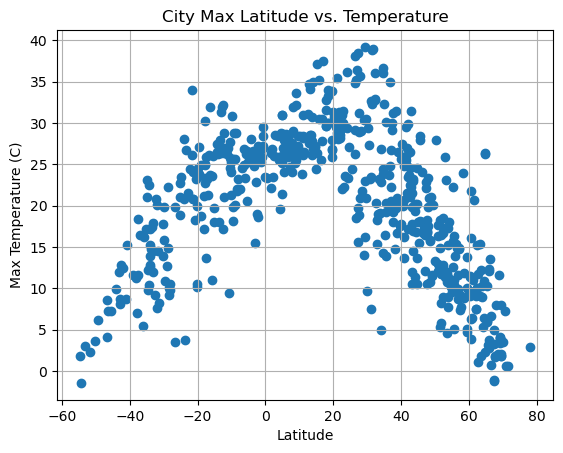

In [20]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

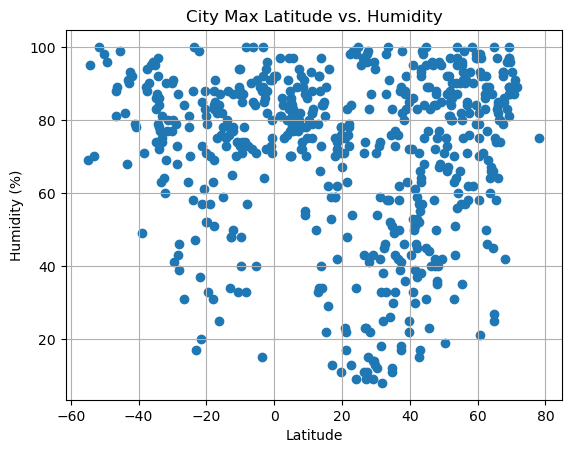

In [24]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

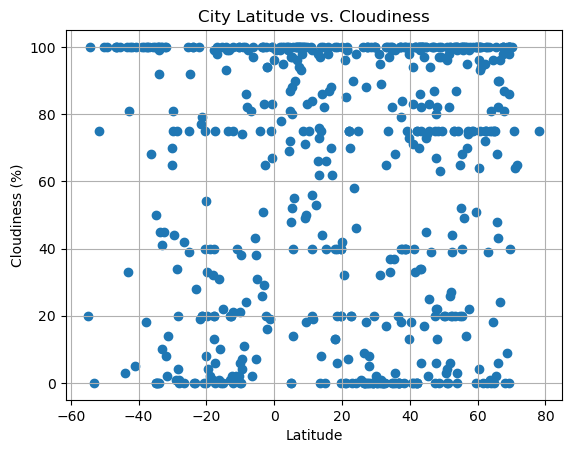

In [25]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

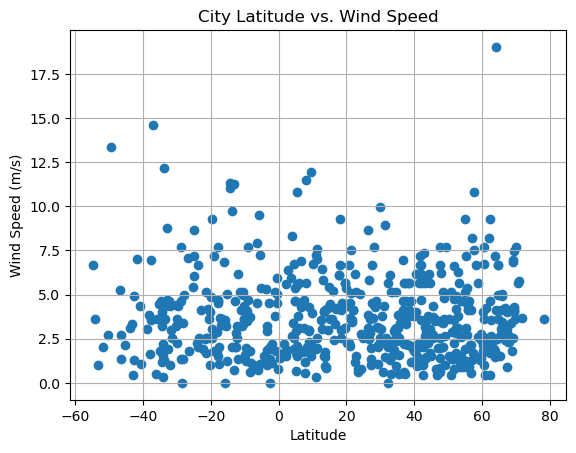

In [26]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,-1.22,93,100,2.30,RU,1717879994
2,albany,42.6001,-73.9662,22.54,57,70,0.45,US,1717879994
3,qui nhon,13.7667,109.2333,27.84,73,100,1.48,VN,1717879995
4,impfondo,1.6381,18.0667,22.14,97,99,1.68,CG,1717879995
7,tazacorte,28.6290,-17.9293,21.75,87,100,4.63,ES,1717879995


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,springbok,-29.6643,17.8865,10.86,41,44,4.34,ZA,1717879994
5,ushuaia,-54.8000,-68.3000,1.81,69,20,6.69,AR,1717879973
6,port-aux-francais,-49.3500,70.2167,6.15,96,100,13.39,TF,1717879995
8,valparaiso,-33.0393,-71.6273,17.86,81,100,8.75,CL,1717879859
9,invercargill,-46.4000,168.3500,7.23,89,100,1.34,NZ,1717879995


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6051152509775819


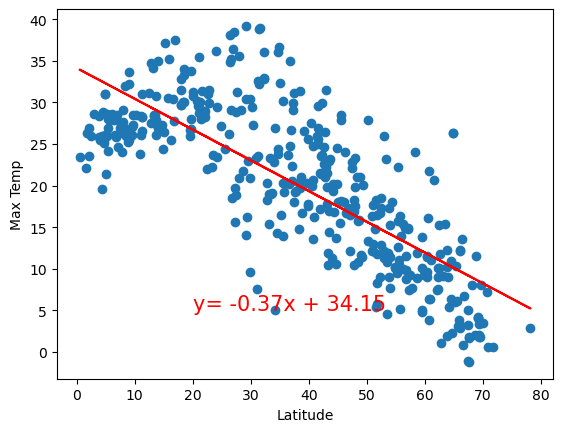

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values)

#Get regression values and plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values* slope + intercept
plt.plot(x_values,regression_values,"r-")
line_eq = f"y= {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()


The r-value is: 0.5772458728126476


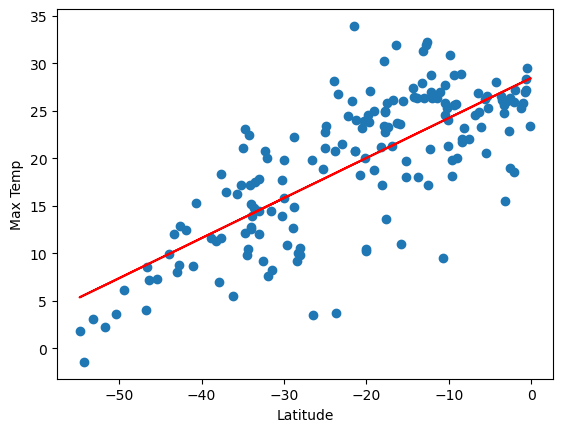

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values)

#Get regression values and plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values* slope + intercept
plt.plot(x_values,regression_values,"r-")
line_eq = f"y= {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both the Nothern and Southern hemispheres, there is a strong correlation between the latitude of a city and its maximum temperature. In the Nothern Hemisphere, as the latitude of a city increases, the maximum temperature decreases, wherease in the Southern Hemisphere, as the latitude decreases, the maximum temperature decreases. Given that a latitude of 0 represents the equator and the absolute increase in latitude represents cities which are nearer to the poles, this relationship makes sense and is to be expected.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007920388758898072


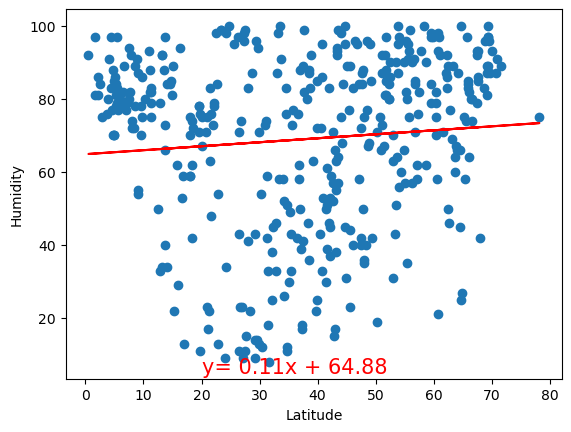

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values,y_values)

#Get regression values and plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values* slope + intercept
plt.plot(x_values,regression_values,"r-")
line_eq = f"y= {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()


The r-value is: 0.01522908865097751


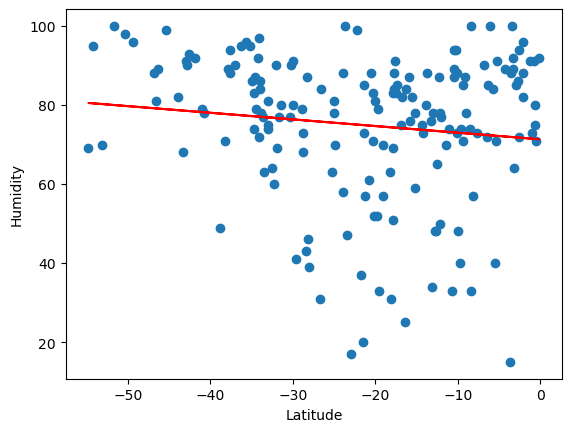

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values,y_values)

#Get regression values and plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values* slope + intercept
plt.plot(x_values,regression_values,"r-")
line_eq = f"y= {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** There is a less strong correlation between latitude and humidity as compared to temperature and humidity. There is a slight trend of humidity increasing with distance from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 1.5553757437838238e-05


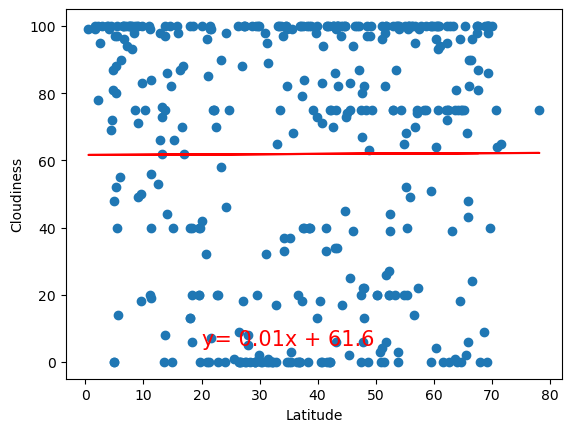

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values)

#Get regression values and plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values* slope + intercept
plt.plot(x_values,regression_values,"r-")
line_eq = f"y= {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.010109062930679346


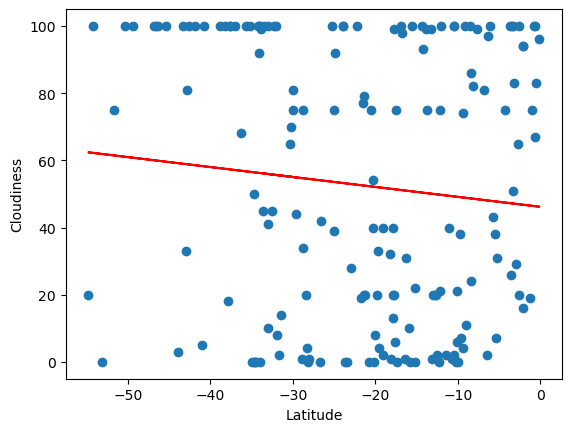

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values)

#Get regression values and plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values* slope + intercept
plt.plot(x_values,regression_values,"r-")
line_eq = f"y= {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is very little correlation between latitude and cloudiness. This makes sense as cloudiness is not a phenomenon that is generally associated with location.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 9.460051337532428e-05


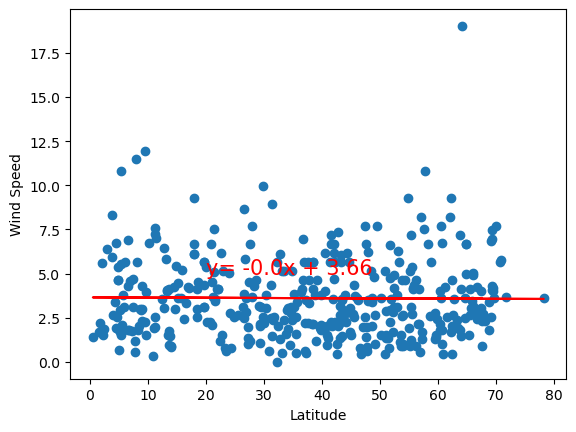

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values)

#Get regression values and plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values* slope + intercept
plt.plot(x_values,regression_values,"r-")
line_eq = f"y= {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.004599550516954443


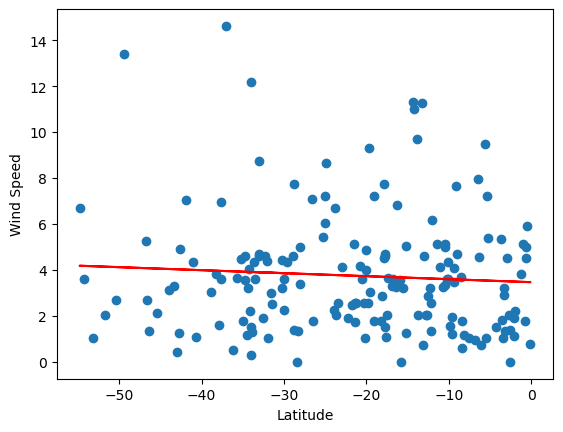

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values)

#Get regression values and plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values* slope + intercept
plt.plot(x_values,regression_values,"r-")
line_eq = f"y= {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is also a pretty minor corrrelatioon between latitude and windspeed. Wind speed is affected by other geographical features other than latitude.